In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carregando Data-set

In [3]:
data = pd.read_excel('Altura-peso.xlsx')
data.corr()

,Peso,Altura
Peso,1.000000,0.912775
Altura,0.912775,1.000000


In [4]:
#Criação do Grafico 

Text(0, 0.5, 'Altura')

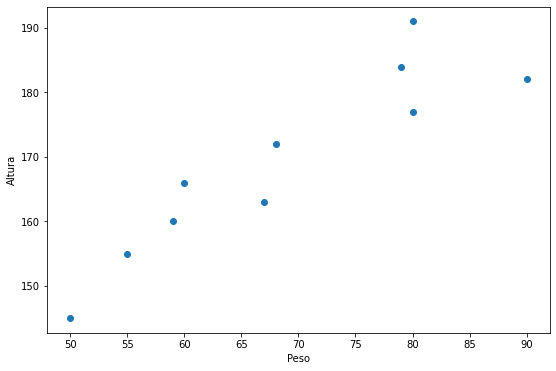

In [5]:
figure = plt.figure(figsize=(9,6))
plt.scatter(data['Peso'], data['Altura'])
plt.xlabel('Peso')
plt.ylabel('Altura')

In [6]:
#Realizando uma tranformação logaritmica para melhor visualização dos dados

Text(0, 0.5, 'Altura')

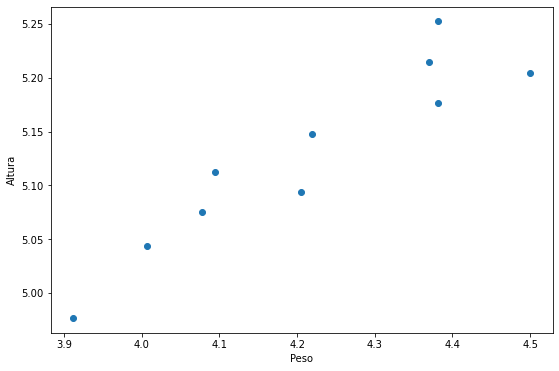

In [7]:
#realizar esse passo caso a tabela contenha muitas informações.

figure = plt.figure(figsize=(9,6))
plt.scatter(np.log(data['Peso']), np.log(data['Altura']))
plt.xlabel('Peso')
plt.ylabel('Altura')

In [8]:
#Preparado os dados: Colocando todas as entradas em uma mesma escala

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Pessoa', axis=1))

col = ['Peso', 'Altura']

new_data = pd.DataFrame(data_scaled, columns=col)
new_data.head()

,Peso,Altura
0,-1.522080,-1.802982
1,-1.117272,-1.067071
2,-0.793425,-0.699116
3,-0.145731,-0.478342
4,-0.712463,-0.257569


In [10]:
learning_rate = 0.1 
interations = 1000 # número de interações
theta = np.array([0,0])

In [11]:
feature = new_data['Peso'].values
y = new_data['Altura'].values
m = len(y)
x0 = np.ones(m)
X = np.c_[x0, feature]
for interation in range(interations):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - learning_rate * gradients

In [12]:
#Com o theta vamos conseguir no primeiro valor a interceptação e no segundo temos o coeficiente

In [13]:
print('Valor da interceptação:')
print(theta[0])
print('Valor do coeficiente:')
print(theta[1])

Valor da interceptação:
-2.7089441800853834e-16
Valor do coeficiente:
0.9127750685278406


In [14]:
#Calculo da Reta de Ajustamento: Montando a Tabela de valores

In [15]:
print(data['Peso'] + data['Altura'])
print('Σx:'+ str(sum(data['Peso'])))
print('Σy:'+ str(sum(data['Altura'])))
XY = data['Peso'] * data['Altura']
print('X * Y:\n' + str(XY))
print('X²:\n' + str(data['Peso']*2))
print('Y²:\n' + str(data['Altura']*2))

0    195
1    210
2    219
3    230
4    226
5    240
6    257
7    272
8    263
9    271
dtype: int64
Σx:688
Σy:1695
X * Y:
0     7250
1     8525
2     9440
3    10921
4     9960
5    11696
6    14160
7    16380
8    14536
9    15280
dtype: int64
X²:
0    100
1    110
2    118
3    134
4    120
5    136
6    160
7    180
8    158
9    160
Name: Peso, dtype: int64
Y²:
0    290
1    310
2    320
3    326
4    332
5    344
6    354
7    364
8    368
9    382
Name: Altura, dtype: int64


In [16]:
#Calculo da Reta de Ajustamento: Coeficientes e valor Y

In [17]:
a = (10 * sum(XY)-(sum(data['Peso']) * sum(data['Altura'])))/(10 * 48860 - 473344)
print(a)
B = (sum(data['Altura'])/10) - (a * (sum(data['Peso'])/10))
print(B)
Y = (a * data['Peso']) + B
print(Y)

1.0041950707918197
100.41137912952281
0    150.621133
1    155.642108
2    159.658888
3    167.692449
4    160.663083
5    168.696644
6    180.746985
7    190.788936
8    179.742790
9    180.746985
Name: Peso, dtype: float64


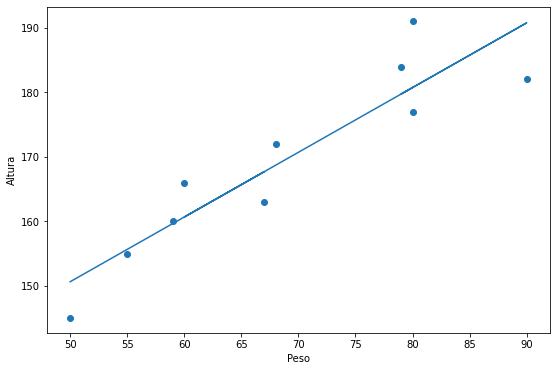

In [18]:
figure = plt.figure(figsize=(9,6))
plt.scatter(data['Peso'], data['Altura'])
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.plot(data['Peso'], Y)

In [ ]:
#LEONARDO GARCIA DE SOUZA – 81622108 
#LUCAS GUSTAVO BARBOSA – 81622845 
#DAIANE GLEYCE GARCIA CONZAGA DA SILVA – 8162259311
#NATHALIA ZANCHTTA NHONCANCE – 8162258212 
#BRUNO GOYA RODRIGUES – RA: 816253781
#VICTORIA CHELSEA LIRA COUTO – RA: 81716252
